In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)

In [3]:
#Scikit-learn has a gradient descent regression model called "sklearn.linear_model.SGDRegressor"
#sklearn.preprocessing.StandardScaler will perform z-score normalization

X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [4]:
#Scale/Normalize the training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train) #Standarize features by removing the mean and scaling to unit variance z = (x - mu) / s
print(f"Peak to PEak range by column in Raw: X:{np.ptp(X_train,axis=0)}")
print(f"Peak to PEak range by column in Normalized: X:{np.ptp(X_norm,axis=0)}")



Peak to PEak range by column in Raw: X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to PEak range by column in Normalized: X:[5.85 6.14 2.06 3.69]


In [5]:
#Create and fit the regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weigth updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 131, number of weigth updates: 12970.0


In [7]:
#Viwe parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w:{w_norm}, b:{b_norm}")
print("model oarameters from previous lab: w:[110.56, -21.27, -32.71, -37.97], b = 363.16")

model parameters: w:[110.31 -21.14 -32.54 -38.04], b:[363.14]
model oarameters from previous lab: w:[110.56, -21.27, -32.71, -37.97], b = 363.16


In [8]:
#Make predictions using sgdr.predict()
y_pred_sgdr = sgdr.predict(X_norm)
#Make a prediction using w,b
y_pred = np.dot(X_norm, w_norm) + b_norm

print(f"Prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgdr).all()}")

print(f"Prediction on training set: \n{y_pred[:4]}")
print(f"Target values \n{y_train[:4]}")



Prediction using np.dot() and sgdr.predict match: True
Prediction on training set: 
[295.12 485.96 389.58 492.12]
Target values 
[300.  509.8 394.  540. ]


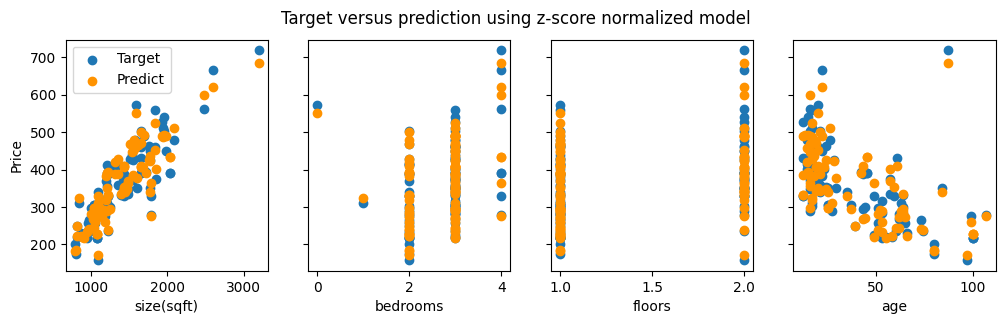

In [12]:
#Let's plot the predictions versus the target values
fig, ax = plt.subplots(1,4, figsize=(12,3), sharey=True)
for i in range (len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='Target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred, color=dlc["dlorange"], label='Predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Target versus prediction using z-score normalized model")
plt.show()
